In [2]:
import mne
#raw = mne.io.read_raw_edf('/Users/seandmello/Desktop/SleepStagingFolder/yasa_example_night_young.edf', preload=True)
raw = mne.io.read_raw_edf('/Users/seandmello/deepsleepnet/data/SC4001E0-PSG.edf', preload=True)
raw

Extracting EDF parameters from /Users/seandmello/deepsleepnet/data/SC4001E0-PSG.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 7949999  =      0.000 ... 79499.990 secs...


/var/folders/50/zlq0nxp14sg7srp33ftd50lh0000gn/T/ipykernel_6877/1029417853.py:3: RuntimeWarning: Channels contain different highpass filters. Highest filter setting will be stored.
  raw = mne.io.read_raw_edf('/Users/seandmello/deepsleepnet/data/SC4001E0-PSG.edf', preload=True)
/var/folders/50/zlq0nxp14sg7srp33ftd50lh0000gn/T/ipykernel_6877/1029417853.py:3: RuntimeWarning: Channels contain different lowpass filters. Lowest filter setting will be stored.
  raw = mne.io.read_raw_edf('/Users/seandmello/deepsleepnet/data/SC4001E0-PSG.edf', preload=True)
/var/folders/50/zlq0nxp14sg7srp33ftd50lh0000gn/T/ipykernel_6877/1029417853.py:3: RuntimeWarning: Highpass cutoff frequency 16.0 is greater than lowpass cutoff frequency 0.7, setting values to 0 and Nyquist.
  raw = mne.io.read_raw_edf('/Users/seandmello/deepsleepnet/data/SC4001E0-PSG.edf', preload=True)


<RawEDF | SC4001E0-PSG.edf, 7 x 7950000 (79500.0 s), ~424.6 MB, data loaded>

In [4]:
pip install --upgrade scipy

Note: you may need to restart the kernel to use updated packages.


In [5]:
pip install scipy==1.11.3

     |████████████████████████████████| 37.3 MB 87.9 MB/s eta 0:00:01
  Attempting uninstall: scipy
    Found existing installation: scipy 1.13.1
    Uninstalling scipy-1.13.1:
      Successfully uninstalled scipy-1.13.1
Note: you may need to restart the kernel to use updated packages.


In [ ]:
print(raw.ch_names)

In [2]:
raw.drop_channels(['ROC-A1', 'LOC-A2', 'EMG1-EMG2', 'EKG-R-EKG-L'])
chan = raw.ch_names
print(chan)

['C3-A2', 'O2-A1', 'C4-A1', 'O1-A2', 'Fp1-A2', 'Fp2-A1', 'F7-A2', 'F3-A2', 'FZ-A2', 'F4-A1', 'F8-A1', 'T3-A2', 'CZ-A2', 'T4-A1', 'T5-A2', 'P3-A2', 'PZ-A2', 'P4-A1', 'T6-A1']


In [3]:
print(raw.info['sfreq'])

200.0


In [4]:
raw.resample(100)
sf = raw.info['sfreq']
sf

100.0

In [5]:
# We use "verbose" and ";" to disable the text output
>>> raw.filter(0.3, 45)

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.3 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.30
- Lower transition bandwidth: 0.30 Hz (-6 dB cutoff frequency: 0.15 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 5.00 Hz (-6 dB cutoff frequency: 47.50 Hz)
- Filter length: 1101 samples (11.010 s)



[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  19 out of  19 | elapsed:    1.0s finished


<RawEDF | yasa_example_night_young.edf, 19 x 2892000 (28920.0 s), ~419.2 MB, data loaded>

In [6]:
data = raw.get_data(units="uV")
print(data.shape)

(19, 2892000)


In [4]:
import pandas as pd

# Read the CSV without 'squeeze'
#hypno = pd.read_csv("/Users/seandmello/Desktop/SleepStagingFolder/yasa_example_night_young_hypno.csv")
#hypno = mne.io.read_raw_edf("/Users/seandmello/deepsleepnet/data/SC4001E0-PSG.edf")


# Load the EDF file
hypno1 = mne.io.read_raw_edf("/Users/seandmello/deepsleepnet/data/SC4001E0-PSG.edf", preload=True)

# Extract the data as a Pandas DataFrame
# Convert the data from the selected channel(s) to a DataFrame
hypno = hypno1.to_data_frame()


# If hypno is a single-column DataFrame, convert it to a Series
if hypno.shape[1] == 1:
    hypno = hypno.iloc[:, 0]

print(hypno)
hypno

Extracting EDF parameters from /Users/seandmello/deepsleepnet/data/SC4001E0-PSG.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...


/var/folders/50/zlq0nxp14sg7srp33ftd50lh0000gn/T/ipykernel_6877/3041114690.py:9: RuntimeWarning: Channels contain different highpass filters. Highest filter setting will be stored.
  hypno1 = mne.io.read_raw_edf("/Users/seandmello/deepsleepnet/data/SC4001E0-PSG.edf", preload=True)
/var/folders/50/zlq0nxp14sg7srp33ftd50lh0000gn/T/ipykernel_6877/3041114690.py:9: RuntimeWarning: Channels contain different lowpass filters. Lowest filter setting will be stored.
  hypno1 = mne.io.read_raw_edf("/Users/seandmello/deepsleepnet/data/SC4001E0-PSG.edf", preload=True)
/var/folders/50/zlq0nxp14sg7srp33ftd50lh0000gn/T/ipykernel_6877/3041114690.py:9: RuntimeWarning: Highpass cutoff frequency 16.0 is greater than lowpass cutoff frequency 0.7, setting values to 0 and Nyquist.
  hypno1 = mne.io.read_raw_edf("/Users/seandmello/deepsleepnet/data/SC4001E0-PSG.edf", preload=True)


Reading 0 ... 7949999  =      0.000 ... 79499.990 secs...
             time  EEG Fpz-Cz  EEG Pz-Oz  EOG horizontal  Resp oro-nasal  \
0            0.00    5.016850  -2.467399       16.508669   -4.820000e+08   
1            0.01   -2.578755   1.467399       16.015873   -4.796749e+08   
2            0.02    1.359707  -4.098901        9.609524   -4.770596e+08   
3            0.03   -2.391209  -2.659341        1.724786   -4.741537e+08   
4            0.04   -5.204396  -0.739927        7.638339   -4.709567e+08   
...           ...         ...        ...             ...             ...   
7949995  79499.95   11.299634  -6.882051       82.050549   -4.893046e+08   
7949996  79499.96    3.610256  -8.609524       62.338706   -4.884160e+08   
7949997  79499.97    5.298168  -3.043223       69.730647   -4.872426e+08   
7949998  79499.98   -4.641758  -3.715018       80.572161   -4.857829e+08   
7949999  79499.99    6.610989   1.755311      102.255189   -4.840357e+08   

         EMG submental   Temp

,time,EEG Fpz-Cz,EEG Pz-Oz,EOG horizontal,Resp oro-nasal,EMG submental,Temp rectal,Event marker
0,0.00,5.016850,-2.467399,16.508669,-4.820000e+08,3.552000,3.720645e+07,9.200000e+08
1,0.01,-2.578755,1.467399,16.015873,-4.796749e+08,3.553216,3.720516e+07,9.199502e+08
2,0.02,1.359707,-4.098901,9.609524,-4.770596e+08,3.554425,3.720391e+07,9.198929e+08
3,0.03,-2.391209,-2.659341,1.724786,-4.741537e+08,3.555626,3.720269e+07,9.198282e+08
4,0.04,-5.204396,-0.739927,7.638339,-4.709567e+08,3.556817,3.720152e+07,9.197560e+08
...,...,...,...,...,...,...,...,...
7949995,79499.95,11.299634,-6.882051,82.050549,-4.893046e+08,3.545879,3.721350e+07,9.201353e+08
7949996,79499.96,3.610256,-8.609524,62.338706,-4.884160e+08,3.547104,3.721201e+07,9.201235e+08
7949997,79499.97,5.298168,-3.043223,69.730647,-4.872426e+08,3.548330,3.721056e+07,9.201040e+08
7949998,79499.98,-4.641758,-3.715018,80.572161,-4.857829e+08,3.549555,3.720915e+07,9.200769e+08


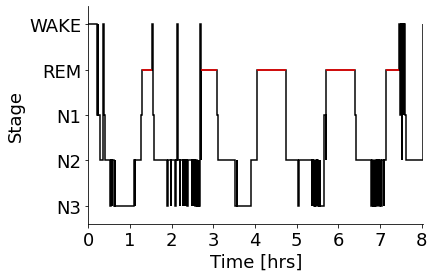

In [8]:
import yasa
yasa.plot_hypnogram(hypno);

In [9]:
yasa.sleep_statistics(hypno, sf_hyp=1/30)

{'TIB': 482.0,
 'SPT': 468.5,
 'WASO': 9.0,
 'TST': 459.5,
 'N1': 17.5,
 'N2': 214.0,
 'N3': 85.5,
 'REM': 142.5,
 'NREM': 317.0,
 'SOL': 13.0,
 'Lat_N1': 13.0,
 'Lat_N2': 16.5,
 'Lat_N3': 31.5,
 'Lat_REM': 77.0,
 '%N1': 3.808487486398259,
 '%N2': 46.572361262241564,
 '%N3': 18.607181719260065,
 '%REM': 31.01196953210011,
 '%NREM': 68.98803046789989,
 'SE': 95.33195020746888,
 'SME': 98.07897545357524}

In [10]:
counts, probs = yasa.transition_matrix(hypno)
probs.round(3)

To Stage,0,1,2,3,4
From Stage,,,,,
0,0.773,0.205,0.023,0.000,0.000
1,0.086,0.629,0.257,0.000,0.029
2,0.009,0.002,0.876,0.103,0.009
3,0.006,0.006,0.246,0.743,0.000
4,0.007,0.007,0.004,0.000,0.982


In [11]:
import numpy as np
np.diag(probs.loc[2:, 2:]).mean().round(3)

0.867

In [12]:
hypno_up = yasa.hypno_upsample_to_data(hypno, sf_hypno=1/30, data=raw)
print(len(hypno_up))

2892000


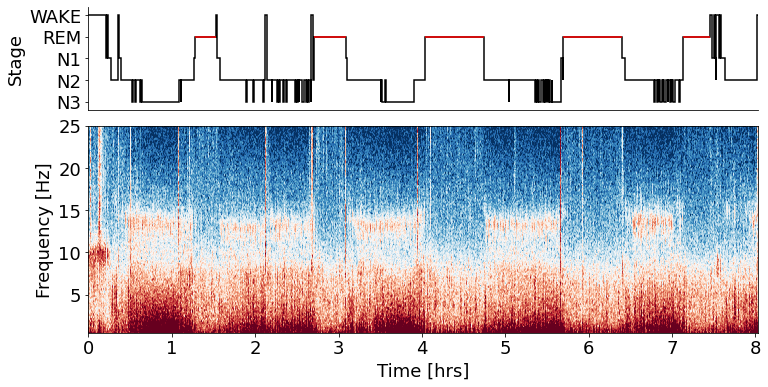

In [13]:
yasa.plot_spectrogram(data[chan.index("C4-A1")], sf, hypno_up);


In [14]:
yasa.bandpower(raw)

,Delta,Theta,Alpha,Sigma,Beta,Gamma,TotalAbsPow,FreqRes,Relative
Chan,,,,,,,,,
C3-A2,0.739658,0.176239,0.047144,0.021317,0.013231,0.002413,123.428002,0.25,True
O2-A1,0.715889,0.185061,0.058568,0.025829,0.013081,0.001572,129.104822,0.25,True
C4-A1,0.742428,0.178749,0.044467,0.020102,0.012300,0.001954,144.129054,0.25,True
O1-A2,0.716377,0.188104,0.055707,0.024907,0.013153,0.001752,99.277561,0.25,True
Fp1-A2,0.828335,0.118760,0.030653,0.011095,0.009367,0.001792,162.937314,0.25,True
Fp2-A1,0.822891,0.123286,0.030834,0.011346,0.009967,0.001675,168.516844,0.25,True
F7-A2,0.794740,0.139952,0.037146,0.014804,0.011442,0.001916,111.894873,0.25,True
F3-A2,0.770240,0.158311,0.041458,0.015771,0.011909,0.002312,152.175138,0.25,True
FZ-A2,0.770151,0.163893,0.039909,0.014074,0.009971,0.002001,189.026577,0.25,True


In [15]:
yasa.bandpower(raw, relative=False, bands=[(1, 9, "Slow"), (9, 30, "Fast")])

,Slow,Fast,TotalAbsPow,FreqRes,Relative
Chan,,,,,
C3-A2,79.361806,7.653446,87.015252,0.25,False
O2-A1,84.379108,9.370239,93.749347,0.25,False
C4-A1,94.211885,8.457775,102.669660,0.25,False
O1-A2,65.863712,6.981278,72.844990,0.25,False
Fp1-A2,93.262143,6.333485,99.595628,0.25,False
Fp2-A1,98.157068,6.754739,104.911807,0.25,False
F7-A2,65.786313,5.407878,71.194191,0.25,False
F3-A2,94.863903,7.957011,102.820914,0.25,False
FZ-A2,120.902045,9.080101,129.982146,0.25,False


In [16]:
bandpower = yasa.bandpower(raw, hypno=hypno_up, include=(2, 3, 4))

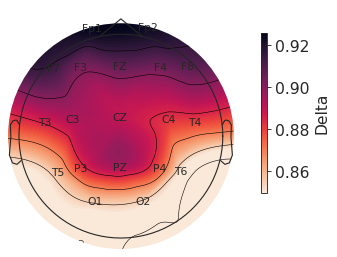

In [17]:
fig = yasa.topoplot(bandpower.xs(3)['Delta'])

In [18]:
sp = yasa.spindles_detect(raw, hypno=hypno_up, include=(2, 3))


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.3s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  19 out of  19 | elapsed:    1.4s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.3s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  19 out of  19 | elapsed:    1.3s finished


In [19]:
sp.summary()

,Start,Peak,End,Duration,Amplitude,RMS,AbsPower,RelPower,Frequency,Oscillations,Symmetry,Stage,Channel,IdxChannel
0,1421.19,1421.48,1421.81,0.62,44.199621,9.708537,1.787729,0.291183,12.449296,7.0,0.460317,2,C3-A2,0
1,1527.40,1527.56,1527.92,0.52,39.113277,8.020877,1.711385,0.325477,13.639412,5.0,0.301887,2,C3-A2,0
2,1530.23,1530.95,1530.99,0.76,42.290339,10.362718,1.842073,0.265396,12.729828,10.0,0.935065,2,C3-A2,0
3,1535.13,1535.46,1536.32,1.19,52.396018,10.033315,1.925131,0.474792,13.730957,15.0,0.275000,2,C3-A2,0
4,1549.61,1550.08,1550.55,0.94,40.892789,10.036494,2.110397,0.523719,13.347028,13.0,0.494737,2,C3-A2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6242,28695.91,28696.33,28696.62,0.71,35.104525,8.720188,1.682306,0.248713,13.753436,8.0,0.583333,2,T6-A1,18
6243,28707.86,28708.18,28708.38,0.52,39.108004,8.451774,1.794338,0.291040,13.866741,7.0,0.603774,2,T6-A1,18
6244,28717.82,28718.16,28719.29,1.47,41.165725,8.606583,1.498107,0.249738,12.879840,18.0,0.229730,2,T6-A1,18
6245,28720.66,28721.00,28721.64,0.98,38.409060,9.523745,1.881278,0.321622,13.419676,12.0,0.343434,2,T6-A1,18


In [20]:
sp.summary(grp_chan=True, grp_stage=True)


Count   Density  Duration  Amplitude        RMS  AbsPower  \
Stage Channel                                                              
2     C3-A2      368  1.719626  0.791087  46.486313  10.315285  1.992547   
      C4-A1      313  1.462617  0.792300  51.202672  11.466790  2.075634   
      CZ-A2      323  1.509346  0.810929  59.995110  13.392674  2.207375   
      F3-A2      210  0.981308  0.795476  50.114055  11.346969  2.062967   
      F4-A1      266  1.242991  0.813195  54.295068  12.228071  2.119378   
      F7-A2       90  0.420561  0.718667  35.318405   7.952189  1.743402   
      F8-A1      147  0.686916  0.779320  39.077849   8.781296  1.828345   
      FZ-A2      210  0.981308  0.784381  56.600556  12.831021  2.162735   
      Fp1-A2      49  0.228972  0.739796  41.472701   9.300618  1.877880   
      Fp2-A1     134  0.626168  0.770373  45.714719  10.451173  1.991156   
      O1-A2      412  1.925234  0.808956  43.692037   9.711648  1.950910   
      O2-A1      379  1.771028  0.824116  49.525075  11.019275  2.041266   
      P3-A2      649  3.032710  0.851310  52.774575  11.719774  2.118961   
      P4-A1      518  2.420561  0.834440  53.128355  11.833840  2.118883   
      PZ-A2      628  2.934579  0.855398  57.537985  12.808476  2.201669   
      T3-A2      193  0.901869  0.738653  36.669919   8.156961  1.779684   
      T4-A1      135  0.630841  0.753926  37.297830   8.358529  1.776438   
      T5-A2      433  2.023364  0.789400  42.287889   9.384972  1.899506   
      T6-A1      298  1.392523  0.785101  39.955744   8.786098  1.834163   
3     C3-A2       30  0.350877  0.677333  51.014143  11.928773  2.144148   
      C4-A1       25  0.292398  0.709600  55.176345  12.330992  2.189722   
      CZ-A2       35  0.409357  0.702000  67.191462  15.444919  2.395285   
      F3-A2       11  0.128655  0.582727  50.189592  11.832962  2.131480   
      F4-A1       23  0.269006  0.680000  56.548544  13.241754  2.239401   
      F7-A2        1  0.011696  0.540000  28.434056   7.605510  1.926478   
      F8-A1       12  0.140351  0.665833  42.185143   9.426390  1.909112   
      FZ-A2       16  0.187135  0.670000  64.615847  15.013510  2.337601   
      Fp1-A2       1  0.011696  0.650000  46.056649  11.581472  1.977469   
      Fp2-A1      10  0.116959  0.727000  52.671032  11.578564  2.101034   
      O1-A2       40  0.467836  0.685000  45.290178  10.346332  2.008426   
      O2-A1       36  0.421053  0.694167  49.659406  11.454302  2.124177   
      P3-A2       65  0.760234  0.723692  53.267283  12.670529  2.216129   
      P4-A1       54  0.631579  0.689074  54.895804  12.485172  2.178222   
      PZ-A2       65  0.760234  0.731846  60.763674  14.011689  2.297198   
      T3-A2       14  0.163743  0.607857  35.662573   8.649291  1.845575   
      T4-A1        7  0.081871  0.595714  40.398326   8.452048  1.853121   
      T5-A2       31  0.362573  0.679355  42.236911  10.150075  1.974426   
      T6-A1       16  0.187135  0.713750  41.914279   9.138495  1.849285   

               RelPower  Frequency  Oscillations  Symmetry  
Stage Channel                                               
2     C3-A2    0.367287  13.222316     10.100543  0.469442  
      C4-A1    0.361675  13.090701     10.054313  0.498864  
      CZ-A2    0.368322  13.192334     10.399381  0.463475  
      F3-A2    0.335982  12.703521      9.814286  0.480462  
      F4-A1    0.339452  12.555387      9.954887  0.474725  
      F7-A2    0.316594  12.688109      8.777778  0.468204  
      F8-A1    0.328016  12.500433      9.503401  0.493004  
      FZ-A2    0.341902  12.799484      9.747619  0.478855  
      Fp1-A2   0.311935  12.492221      8.959184  0.502645  
      Fp2-A1   0.328102  12.421482      9.380597  0.524298  
      O1-A2    0.373433  13.253404     10.417476  0.479559  
      O2-A1    0.371254  13.256191     10.649077  0.484651  
      P3-A2    0.396376  13.298344     11.018490  0.470778  
      P4-A1    0.388522  13.315177     10.820463  0.482644 

/Users/seandmello/opt/anaconda3/lib/python3.9/site-packages/yasa/detection.py:478: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=df_sync, x="Time", y="Amplitude", hue=hue, ax=ax, **kwargs)


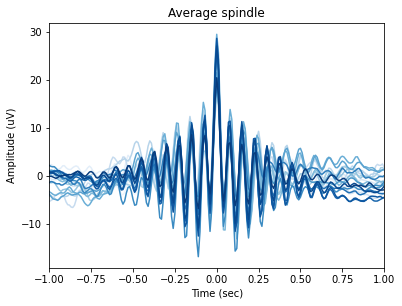

In [21]:
# Because of the large number of channels, we disable the 95%CI and legend
sp.plot_average(ci=None, legend=False, palette="Blues");

CPU times: user 1.61 s, sys: 758 ms, total: 2.37 s
Wall time: 3.69 s


/Users/seandmello/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:329: UserWarning: Trying to unpickle estimator LabelEncoder from version 0.24.2 when using version 1.0.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/modules/model_persistence.html#security-maintainability-limitations
  warnings.warn(


<AxesSubplot:xlabel='Time [hrs]', ylabel='Stage'>

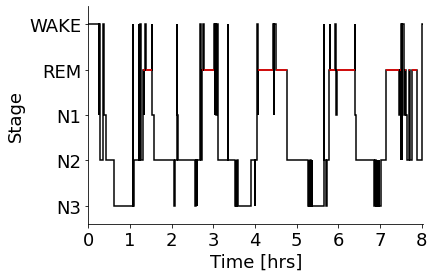

In [41]:
%%time
sls = yasa.SleepStaging(raw, eeg_name='C3-A2')
hypno_pred = sls.predict()  # Predict the sleep stages
hypno_pred = yasa.hypno_str_to_int(hypno_pred)  # Convert "W" to 0, "N1" to 1, etc
yasa.plot_hypnogram(hypno_pred);  # Plot

In [23]:
from sklearn.metrics import accuracy_score
print(f"The accuracy is {100 * accuracy_score(hypno, hypno_pred):.3f}%")


The accuracy is 82.158%


In [25]:
sf_hyp=1/30
sleep_stage_durations = hypno.value_counts() * (1 / sf_hyp)  # in seconds
print(sleep_stage_durations)

2    12840.0
4     8550.0
3     5130.0
0     1350.0
1     1050.0
Name: Stage, dtype: float64


In [26]:
# Bandpower during slow-wave sleep (delta waves)
n3_indices = hypno == 3  # N3 stage
n3_data = data[:, n3_indices]  # Extract N3 data
slow_wave_power = yasa.bandpower(n3_data, bands=[(0.5, 4)], relative=False)
print(slow_wave_power)

IndexError: boolean index did not match indexed array along dimension 1; dimension is 2892000 but corresponding boolean dimension is 964

In [28]:
hypno_up = yasa.hypno_upsample_to_data(hypno, sf_hypno=1/30, data=raw)
n3_indices = hypno_up == 3  # Identify N3 stages
n3_data = data[:, n3_indices]  # Extract EEG data for N3

In [29]:
slow_wave_power = yasa.bandpower(n3_data, sf=sf, bands=[(0.5, 4, 'Delta')], relative=False)
print(slow_wave_power)

              Delta  TotalAbsPow  FreqRes  Relative
Chan                                               
CHAN000  400.935200   400.935200     0.25     False
CHAN001  315.942323   315.942323     0.25     False
CHAN002  404.646700   404.646700     0.25     False
CHAN003  263.026948   263.026948     0.25     False
CHAN004  530.308176   530.308176     0.25     False
CHAN005  542.918894   542.918894     0.25     False
CHAN006  357.482657   357.482657     0.25     False
CHAN007  492.411400   492.411400     0.25     False
CHAN008  632.098427   632.098427     0.25     False
CHAN009  532.680789   532.680789     0.25     False
CHAN010  350.377803   350.377803     0.25     False
CHAN011  280.311509   280.311509     0.25     False
CHAN012  560.011708   560.011708     0.25     False
CHAN013  251.133333   251.133333     0.25     False
CHAN014  255.320183   255.320183     0.25     False
CHAN015  408.133734   408.133734     0.25     False
CHAN016  522.171866   522.171866     0.25     False
CHAN017  393

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.3s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.4s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.5s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.6s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  19 out of  19 | elapsed:    2.7s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.3s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.4s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  19 out of  19 | elapsed:    1.9s finished


               Count   Density  Duration  Amplitude        RMS  AbsPower  \
Stage Channel                                                              
2     C3-A2      368  1.719626  0.791087  46.486313  10.315285  1.992547   
      C4-A1      313  1.462617  0.792300  51.202672  11.466790  2.075634   
      CZ-A2      323  1.509346  0.810929  59.995110  13.392674  2.207375   
      F3-A2      210  0.981308  0.795476  50.114055  11.346969  2.062967   
      F4-A1      266  1.242991  0.813195  54.295068  12.228071  2.119378   
      F7-A2       90  0.420561  0.718667  35.318405   7.952189  1.743402   
      F8-A1      147  0.686916  0.779320  39.077849   8.781296  1.828345   
      FZ-A2      210  0.981308  0.784381  56.600556  12.831021  2.162735   
      Fp1-A2      49  0.228972  0.739796  41.472701   9.300618  1.877880   
      Fp2-A1     134  0.626168  0.770373  45.714719  10.451173  1.991156   
      O1-A2      412  1.925234  0.808956  43.692037   9.711648  1.950910   
      O2-A1 

/Users/seandmello/opt/anaconda3/lib/python3.9/site-packages/yasa/detection.py:478: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=df_sync, x="Time", y="Amplitude", hue=hue, ax=ax, **kwargs)


Spindle Counts by Channel:
Channel
C3-A2     398
C4-A1     338
CZ-A2     358
F3-A2     221
F4-A1     289
F7-A2      91
F8-A1     159
FZ-A2     226
Fp1-A2     50
Fp2-A1    144
O1-A2     452
O2-A1     415
P3-A2     714
P4-A1     572
PZ-A2     693
T3-A2     207
T4-A1     142
T5-A2     464
T6-A1     314
Name: Count, dtype: int64
Average Spindle Duration: 0.73 seconds
Average Spindle Amplitude: 48.19 µV
Average Spindle Frequency: 12.99 Hz


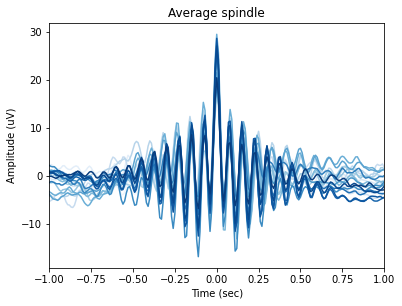

In [30]:
import yasa

# Detect sleep spindles in the EEG data
# Specify the EEG channels of interest and include relevant sleep stages (e.g., N2, N3)
sp = yasa.spindles_detect(
    raw, 
    hypno=hypno_up,      # Upsampled hypnogram
    include=(2, 3)       # Only include N2 and N3 stages
)

# Generate a summary of detected spindles
sp_summary = sp.summary(grp_chan=True, grp_stage=True)  # Group by channel and stage
print(sp_summary)

# Extract average spindle properties (duration, amplitude, frequency)
average_duration = sp_summary["Duration"].mean()
average_amplitude = sp_summary["Amplitude"].mean()
average_frequency = sp_summary["Frequency"].mean()

# Plot average spindle waveform
sp.plot_average(ci=None, legend=False, palette="Blues");

# Optional: Save the spindle summary to a CSV file
sp_summary.to_csv('spindle_summary.csv', index=False)

# Generate a channel-wise spindle count table
spindle_counts = sp_summary.groupby('Channel')['Count'].sum()
print("Spindle Counts by Channel:")
print(spindle_counts)

# Summary Statistics Output
print(f"Average Spindle Duration: {average_duration:.2f} seconds")
print(f"Average Spindle Amplitude: {average_amplitude:.2f} µV")
print(f"Average Spindle Frequency: {average_frequency:.2f} Hz")

In [35]:
import mne
import numpy as np
import pandas as pd
import yasa
from scipy.signal import hilbert, butter, filtfilt
from sklearn.decomposition import FastICA

# Step 1: Load data
raw = mne.io.read_raw_edf('/Users/seandmello/Desktop/SleepStagingFolder/yasa_example_night_young.edf', preload=True)
raw.drop_channels(['ROC-A1', 'LOC-A2', 'EMG1-EMG2', 'EKG-R-EKG-L'])  # Remove unwanted channels

# Step 2: Resample and preprocess data
raw.resample(100)  # Resample to 100 Hz
sf = raw.info['sfreq']
raw.filter(0.3, 45)  # Filter EEG for relevant frequencies (e.g., 0.3 - 45 Hz)

# Step 3: ICA Decomposition
ica = FastICA(n_components=raw.info['nchan'], random_state=97)
eeg_data = raw.get_data()
ica.fit(eeg_data.T)  # Fit ICA to EEG data

# Identify components that correspond to spike-like activity
# (In a real application, we'd use heuristics, but we automate by rejecting noisy components based on their features)
# In this case, we can assume that components which have a high kurtosis are related to spikes
spike_components = []
for i in range(len(ica.components_)):
    # Compute kurtosis to identify potential spike-like components
    kurt = np.mean(ica.components_[i]**4) / (np.mean(ica.components_[i]**2)**2) - 3
    if kurt > 3:  # Threshold for spike-like activity
        spike_components.append(i)

# Step 4: Back-project components into EEG space (remove spike-related components)
ica.exclude = spike_components  # Mark components for rejection
raw_clean = ica.apply(raw.copy())  # Apply ICA to remove spikes

# Step 5: Apply high-pass filter and extract the envelope using Hilbert Transform
data = raw_clean.get_data()  # Get EEG data after ICA
channel = 'C3-A2'  # Specify channel of interest (example)
signal = data[raw.info['ch_names'].index(channel), :]  # Extract signal of the chosen channel

# Define a high-pass filter function
def highpass_filter(signal, cutoff=5, fs=100):
    nyquist = 0.5 * fs
    normal_cutoff = cutoff / nyquist
    b, a = butter(1, normal_cutoff, btype='high', analog=False)
    return filtfilt(b, a, signal)

# Apply high-pass filter to the signal
filtered_signal = highpass_filter(signal)

# Step 6: Extract the envelope using the Hilbert Transform
analytic_signal = hilbert(filtered_signal)
envelope = np.abs(analytic_signal)

# Step 7: Define the threshold and detect spikes
mean_env = np.mean(envelope)
std_env = np.std(envelope)
threshold = mean_env + 2.5 * std_env  # Set threshold for spike detection

# Step 8: Detect spikes
spike_events = (envelope > threshold).astype(int)  # 1 if above threshold, 0 otherwise

# Find the start and end of each spike (based on threshold crossing)
spike_starts = np.where(np.diff(spike_events) == 1)[0]  # where threshold is crossed upwards
spike_ends = np.where(np.diff(spike_events) == -1)[0]  # where threshold is crossed downwards

# Merge close spikes (less than 50 ms apart, assume sampling rate of 100 Hz)
min_distance = 5  # 50 ms = 5 samples at 100 Hz
merged_spikes = []
for start, end in zip(spike_starts, spike_ends):
    if len(merged_spikes) > 0 and start - merged_spikes[-1][1] < min_distance:
        merged_spikes[-1] = (merged_spikes[-1][0], end)  # Merge if too close
    else:
        merged_spikes.append((start, end))

# Step 9: Create spike-free dataset by spline interpolation
spike_free_data = np.copy(signal)
for start, end in merged_spikes:
    # Perform spline interpolation on the identified spike range
    spike_free_data[start:end] = np.interp(np.arange(start, end), np.delete(np.arange(len(signal)), np.arange(start, end)), np.delete(signal, np.arange(start, end)))

# Step 10: Calculate spike rate (spikes per minute)
spike_rate = len(merged_spikes) / (len(signal) / sf / 60)  # Spikes per minute

# Step 11: Report results
print(f"Detected {len(merged_spikes)} spikes.")
print(f"Spike rate: {spike_rate} spikes/minute.")

# Optionally, plot the original and spike-free signals
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 6))
plt.subplot(2, 1, 1)
plt.plot(signal, label='Original Signal')
plt.title('Original EEG Signal with Spikes')
plt.subplot(2, 1, 2)
plt.plot(spike_free_data, label='Spike-Free Signal', color='orange')
plt.title('Spike-Free EEG Signal')
plt.tight_layout()
plt.show()

Extracting EDF parameters from /Users/seandmello/Desktop/SleepStagingFolder/yasa_example_night_young.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 5783999  =      0.000 ... 28919.995 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.3 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.30
- Lower transition bandwidth: 0.30 Hz (-6 dB cutoff frequency: 0.15 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 5.00 Hz (-6 dB cutoff frequency: 47.50 Hz)
- Filter length: 1101 samples (11.010 s)



[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  19 out of  19 | elapsed:    1.0s finished


AttributeError: 'FastICA' object has no attribute 'apply'

In [33]:
import mne
import numpy as np
from mne.preprocessing import ICA
from scipy.signal import hilbert, butter, filtfilt

# Step 1: Load data
raw = mne.io.read_raw_edf('/Users/seandmello/Desktop/SleepStagingFolder/yasa_example_night_young.edf', preload=True)
raw.drop_channels(['ROC-A1', 'LOC-A2', 'EMG1-EMG2', 'EKG-R-EKG-L'])  # Remove unwanted channels

# Step 2: Resample and preprocess data
raw.resample(100)  # Resample to 100 Hz
sf = raw.info['sfreq']
raw.filter(0.3, 45)  # Filter EEG for relevant frequencies (e.g., 0.3 - 45 Hz)

# Step 3: ICA Decomposition using MNE's ICA
ica = ICA(n_components=raw.info['nchan'], random_state=97, max_iter=800)
ica.fit(raw)  # Fit ICA to the raw EEG data

# Check if fitting was successful
print(f"ICA fitting successful: {ica.n_components_} components found")

# Step 4: Identify components that correspond to spike-like activity using kurtosis
spike_components = []
for i in range(len(ica.components_)):
    kurt = np.mean(ica.components_[i]**4) / (np.mean(ica.components_[i]**2)**2) - 3
    if kurt > 3:  # Threshold for spike-like activity
        spike_components.append(i)

# Step 5: Exclude the identified spike components
ica.exclude = spike_components  # Mark components for rejection

# Apply ICA to remove the spike-related components from the raw data
raw_clean = ica.apply(raw)  # Apply ICA to the raw EEG to remove spike

# Step 5: Apply high-pass filter and extract the envelope using Hilbert Transform
data = raw_clean.get_data()  # Get EEG data after ICA
channel = 'C3'  # Specify channel of interest (example)
signal = data[raw.info['ch_names'].index(channel), :]  # Extract signal of the chosen channel

# Define a high-pass filter function
def highpass_filter(signal, cutoff=5, fs=100):
    nyquist = 0.5 * fs
    normal_cutoff = cutoff / nyquist
    b, a = butter(1, normal_cutoff, btype='high', analog=False)
    return filtfilt(b, a, signal)

# Apply high-pass filter to the signal
filtered_signal = highpass_filter(signal)

# Step 6: Extract the envelope using the Hilbert Transform
analytic_signal = hilbert(filtered_signal)
envelope = np.abs(analytic_signal)

# Step 7: Define the threshold and detect spikes
mean_env = np.mean(envelope)
std_env = np.std(envelope)
threshold = mean_env + 2.5 * std_env  # Set threshold for spike detection

# Step 8: Detect spikes
spike_events = (envelope > threshold).astype(int)  # 1 if above threshold, 0 otherwise

# Find the start and end of each spike (based on threshold crossing)
spike_starts = np.where(np.diff(spike_events) == 1)[0]  # where threshold is crossed upwards
spike_ends = np.where(np.diff(spike_events) == -1)[0]  # where threshold is crossed downwards

# Merge close spikes (less than 50 ms apart, assume sampling rate of 100 Hz)
min_distance = 5  # 50 ms = 5 samples at 100 Hz
merged_spikes = []
for start, end in zip(spike_starts, spike_ends):
    if len(merged_spikes) > 0 and start - merged_spikes[-1][1] < min_distance:
        merged_spikes[-1] = (merged_spikes[-1][0], end)  # Merge if too close
    else:
        merged_spikes.append((start, end))

# Step 9: Create spike-free dataset by spline interpolation
spike_free_data = np.copy(signal)
for start, end in merged_spikes:
    # Perform spline interpolation on the identified spike range
    spike_free_data[start:end] = np.interp(np.arange(start, end), np.delete(np.arange(len(signal)), np.arange(start, end)), np.delete(signal, np.arange(start, end)))

# Step 10: Calculate spike rate (spikes per minute)
spike_rate = len(merged_spikes) / (len(signal) / sf / 60)  # Spikes per minute

# Step 11: Report results
print(f"Detected {len(merged_spikes)} spikes.")
print(f"Spike rate: {spike_rate} spikes/minute.")

# Optionally, plot the original and spike-free signals
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 6))
plt.subplot(2, 1, 1)
plt.plot(signal, label='Original Signal')
plt.title('Original EEG Signal with Spikes')
plt.subplot(2, 1, 2)
plt.plot(spike_free_data, label='Spike-Free Signal', color='orange')
plt.title('Spike-Free EEG Signal')
plt.tight_layout()
plt.show()

Extracting EDF parameters from /Users/seandmello/Desktop/SleepStagingFolder/yasa_example_night_young.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 5783999  =      0.000 ... 28919.995 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.3 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.30
- Lower transition bandwidth: 0.30 Hz (-6 dB cutoff frequency: 0.15 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 5.00 Hz (-6 dB cutoff frequency: 47.50 Hz)
- Filter length: 1101 samples (11.010 s)



[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.2s remaining:    0.0s


Fitting ICA to data using 19 channels (please be patient, this may take a while)


[Parallel(n_jobs=1)]: Done  19 out of  19 | elapsed:    1.0s finished


Selecting by number: 19 components
Fitting ICA took 77.1s.
ICA fitting successful: 19 components found


AttributeError: 'ICA' object has no attribute 'components_'

Extracting EDF parameters from /Users/seandmello/Desktop/SleepStagingFolder/yasa_example_night_young.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 5783999  =      0.000 ... 28919.995 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.3 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.30
- Lower transition bandwidth: 0.30 Hz (-6 dB cutoff frequency: 0.15 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 5.00 Hz (-6 dB cutoff frequency: 47.50 Hz)
- Filter length: 1101 samples (11.010 s)



[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  19 out of  19 | elapsed:    1.1s finished


Fitting ICA to data using 19 channels (please be patient, this may take a while)
Selecting by number: 19 components
Fitting ICA took 67.6s.
ICA fitting successful: 19 components found
Applying ICA to Raw instance
    Transforming to ICA space (19 components)
    Zeroing out 0 ICA components
    Projecting back using 19 PCA components
Detected 18414 spikes.
Spike rate: 38.20331950207469 spikes/minute.


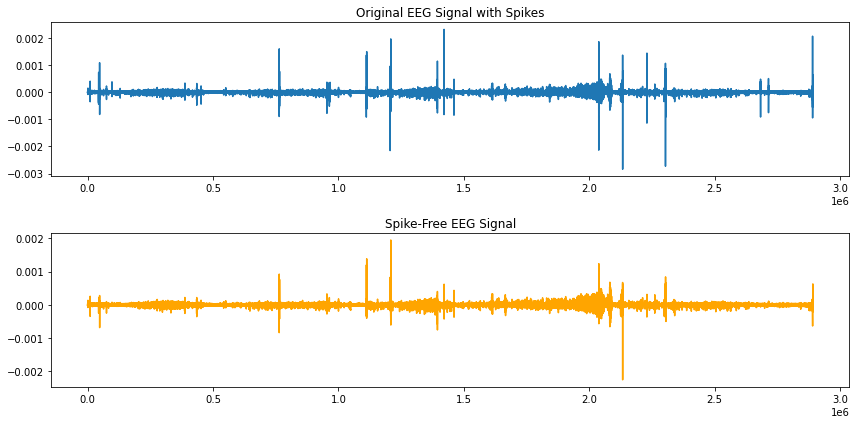

In [40]:
import mne
import numpy as np
from mne.preprocessing import ICA
from scipy.signal import hilbert, butter, filtfilt

# Step 1: Load data
raw = mne.io.read_raw_edf('/Users/seandmello/Desktop/SleepStagingFolder/yasa_example_night_young.edf', preload=True)
raw.drop_channels(['ROC-A1', 'LOC-A2', 'EMG1-EMG2', 'EKG-R-EKG-L'])  # Remove unwanted channels

# Step 2: Resample and preprocess data
raw.resample(100)  # Resample to 100 Hz
sf = raw.info['sfreq']
raw.filter(0.3, 45)  # Filter EEG for relevant frequencies (e.g., 0.3 - 45 Hz)

# Step 3: ICA Decomposition using MNE's ICA
ica = ICA(n_components=raw.info['nchan'], random_state=97, max_iter=800)
ica.fit(raw)  # Fit ICA to the raw EEG data

# Check if fitting was successful
print(f"ICA fitting successful: {ica.n_components_} components found")

# Step 4: Identify components that correspond to spike-like activity using kurtosis
spike_components = []
components = ica.get_components()  # Get components using get_components() method
for i in range(components.shape[0]):
    kurt = np.mean(components[i]**4) / (np.mean(components[i]**2)**2) - 3
    if kurt > 3:  # Threshold for spike-like activity
        spike_components.append(i)

# Step 5: Exclude the identified spike components
ica.exclude = spike_components  # Mark components for rejection

# Apply ICA to remove the spike-related components from the raw data
raw_clean = ica.apply(raw)  # Apply ICA to the raw EEG to remove spikes

# Step 5: Apply high-pass filter and extract the envelope using Hilbert Transform
data = raw_clean.get_data()  # Get EEG data after ICA
channel = 'C3-A2'  # Specify channel of interest (example)
signal = data[raw.info['ch_names'].index(channel), :]  # Extract signal of the chosen channel

# Define a high-pass filter function
def highpass_filter(signal, cutoff=5, fs=100):
    nyquist = 0.5 * fs
    normal_cutoff = cutoff / nyquist
    b, a = butter(1, normal_cutoff, btype='high', analog=False)
    return filtfilt(b, a, signal)

# Apply high-pass filter to the signal
filtered_signal = highpass_filter(signal)

# Step 6: Extract the envelope using the Hilbert Transform
analytic_signal = hilbert(filtered_signal)
envelope = np.abs(analytic_signal)

# Step 7: Define the threshold and detect spikes
mean_env = np.mean(envelope)
std_env = np.std(envelope)
threshold = mean_env + 1.5 * std_env  # Set threshold for spike detection

# Step 8: Detect spikes
spike_events = (envelope > threshold).astype(int)  # 1 if above threshold, 0 otherwise

# Find the start and end of each spike (based on threshold crossing)
spike_starts = np.where(np.diff(spike_events) == 1)[0]  # where threshold is crossed upwards
spike_ends = np.where(np.diff(spike_events) == -1)[0]  # where threshold is crossed downwards

# Merge close spikes (less than 50 ms apart, assume sampling rate of 100 Hz)
min_distance = 5  # 50 ms = 5 samples at 100 Hz
merged_spikes = []
for start, end in zip(spike_starts, spike_ends):
    if len(merged_spikes) > 0 and start - merged_spikes[-1][1] < min_distance:
        merged_spikes[-1] = (merged_spikes[-1][0], end)  # Merge if too close
    else:
        merged_spikes.append((start, end))

# Step 9: Create spike-free dataset by spline interpolation
spike_free_data = np.copy(signal)
for start, end in merged_spikes:
    # Perform spline interpolation on the identified spike range
    spike_free_data[start:end] = np.interp(np.arange(start, end), np.delete(np.arange(len(signal)), np.arange(start, end)), np.delete(signal, np.arange(start, end)))

# Step 10: Calculate spike rate (spikes per minute)
spike_rate = len(merged_spikes) / (len(signal) / sf / 60)  # Spikes per minute

# Step 11: Report results
print(f"Detected {len(merged_spikes)} spikes.")
print(f"Spike rate: {spike_rate} spikes/minute.")

# Optionally, plot the original and spike-free signals
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 6))
plt.subplot(2, 1, 1)
plt.plot(signal, label='Original Signal')
plt.title('Original EEG Signal with Spikes')
plt.subplot(2, 1, 2)
plt.plot(spike_free_data, label='Spike-Free Signal', color='orange')
plt.title('Spike-Free EEG Signal')
plt.tight_layout()
plt.show()

In [38]:

# Step 7: Define the threshold and detect spikes
mean_env = np.mean(envelope)
std_env = np.std(envelope)
threshold = mean_env + 1 * std_env  # Set threshold for spike detection

# Step 8: Detect spikes
spike_events = (envelope > threshold).astype(int)  # 1 if above threshold, 0 otherwise

# Find the start and end of each spike (based on threshold crossing)
spike_starts = np.where(np.diff(spike_events) == 1)[0]  # where threshold is crossed upwards
spike_ends = np.where(np.diff(spike_events) == -1)[0]  # where threshold is crossed downwards

# Merge close spikes (less than 50 ms apart, assume sampling rate of 100 Hz)
min_distance = 5  # 50 ms = 5 samples at 100 Hz
merged_spikes = []
for start, end in zip(spike_starts, spike_ends):
    if len(merged_spikes) > 0 and start - merged_spikes[-1][1] < min_distance:
        merged_spikes[-1] = (merged_spikes[-1][0], end)  # Merge if too close
    else:
        merged_spikes.append((start, end))

# Step 9: Create spike-free dataset by spline interpolation
spike_free_data = np.copy(signal)
for start, end in merged_spikes:
    # Perform spline interpolation on the identified spike range
    spike_free_data[start:end] = np.interp(np.arange(start, end), np.delete(np.arange(len(signal)), np.arange(start, end)), np.delete(signal, np.arange(start, end)))

# Step 10: Calculate spike rate (spikes per minute)
spike_rate = len(merged_spikes) / (len(signal) / sf / 60)  # Spikes per minute

# Step 11: Report results
print(f"Detected {len(merged_spikes)} spikes.")
print(f"Spike rate: {spike_rate} spikes/minute.")

# Optionally, plot the original and spike-free signals
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 6))
plt.subplot(2, 1, 1)
plt.plot(signal, label='Original Signal')
plt.title('Original EEG Signal with Spikes')
plt.subplot(2, 1, 2)
plt.plot(spike_free_data, label='Spike-Free Signal', color='orange')
plt.title('Spike-Free EEG Signal')
plt.tight_layout()
plt.show()


KeyboardInterrupt

